# Statistics in Python

This is a Jupyter notebook that takes you through basic statistics in Python.

## Loading packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

## Calculate some relevant statistics for Atlanta temperatures

Load in and plot Atlanta August monthly mean temperature data using pandas and matplotlib

In [3]:
df=pd.read_csv("ATL_MonMeanTemp_1879_2020.csv")
df

Year   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV  \
0    1879  44.3  43.7  57.6  58.9  69.8  74.9  79.6  73.9  68.7  64.3  53.9   
1    1880  54.3  51.4  55.5  63.4  71.0  76.5  79.2  76.8  69.4  60.8  47.2   
2    1881  40.1  46.6  49.1  59.1  70.8  77.8  81.1  78.8  75.5  67.2  52.6   
3    1882  48.8  52.4  57.4  64.8  66.1  76.6  75.9  75.8  71.7  65.8  51.1   
4    1883  43.0  50.2  50.2  61.6  67.4  76.4  80.1  76.2  71.3  66.0  53.7   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
137  2016  42.4  48.5  60.5  64.1  71.1  81.0  83.4  82.7  78.8  69.6  58.9   
138  2017  52.0  56.1  57.7  67.8  71.1  76.6  81.2  79.2  73.8  65.7  56.2   
139  2018  40.4  57.3  53.5  59.8  74.8  79.8  80.8  79.7  81.0  67.4  50.3   
140  2019  45.9  53.8  55.4  65.3  76.4  77.7  82.2  82.5  82.4  68.4  52.5   
141  2020  49.2  49.9  61.6  61.6  68.9  76.8  82.1  80.9  73.8  67.3  58.9   

      DEC  
0    51.5  
1    42.1  
2    49.6  
3    41.4  
4    48.0  
..    ...  
137  48.9  
138  46.8  
139  48.6  
140  51.2  
141  46.1  

[142 rows x 13 columns]

In [4]:
atl=df.to_numpy()
year = atl[0:,0]
augtemp = atl[0:,8]

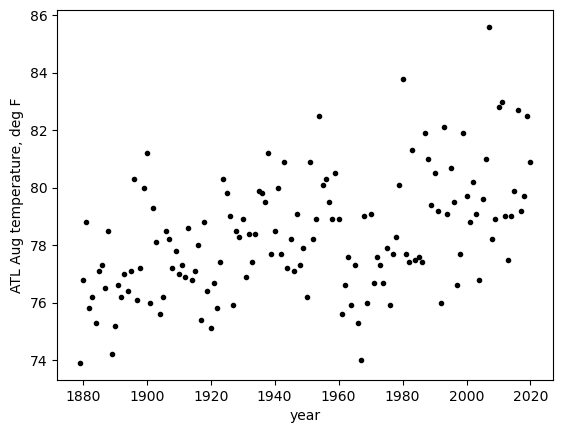

In [5]:
plt.plot(year,augtemp,'k.')
plt.xlabel('year')
plt.ylabel('ATL Aug temperature, deg F')
plt.show()

Calculate the mean and median and Gaussian distribution

In [7]:
augtemp_mean = np.mean(augtemp)
augtemp_median = np.percentile(augtemp,50) #second input is percentile (median is 50th)

temps = np.linspace(np.min(augtemp),np.max(augtemp),100)
augtemp_gauss = (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*((temps-np.mean(augtemp))/np.std(augtemp,ddof=1))**2);

Plot mean and median on a histogram

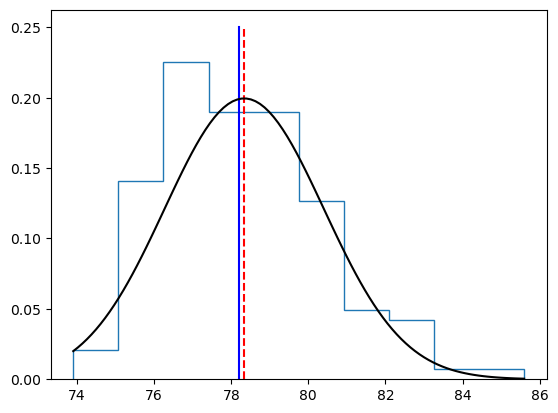

In [13]:
counts, bins = np.histogram(augtemp)
plt.stairs(counts/np.sum(counts), bins) #normalized by total number of observations
plt.plot(augtemp_median*np.ones(5),np.linspace(0,0.25,5),'b-')
plt.plot(augtemp_mean*np.ones(5),np.linspace(0,0.25,5),'r--')
plt.plot(temps,augtemp_gauss/2,'k-')

## Statistical Inference

How to use statistics to answer questions:  
*Science question*: Were the last 10 years  outside of the historical norm for August temperatures in ATL?  
*Statistical question*: Can we reject the null hypothesis at a 95% confidence level that the mean of August temperatures over 2011-2020 was within the distribution of the historical average of Atlanta August temperatures?

In [24]:
nyr = 10

tcrit = scipy.stats.t.ppf(0.95, nyr-1)
aug_recent = augtemp[-nyr:]
tval = (np.mean(aug_recent) - augtemp_mean)/(np.std(aug_recent,ddof=1)/np.sqrt(nyr-1))
tval

3.2310614023170356

In [21]:
tcrit

1.8331129326536335

Because $t_{val}>t_{crit}$, then we can reject the null hypothesis at the chosen confidence level. So, we can conclude at the 95% confidence interval that the average August temperature in Atlanta over the past 10 years is larger than the long-term average.

In [26]:
1-scipy.stats.t.cdf(tval,nyr-1)

0.005152556883335047

Indeed we can actually conclude that this 10-year mean would only be expected to occur 0.5% of the time if the long-term mean remained constant. We can conclude from this, that there is a high chance that the mean of the distribution has changed.